In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('F:\my project\dataset\learning_dataset\\simple_hire.csv')
df

,year_ex,employed,per_emp,lvl,top_tier,interned,hired
0,10,y,4,bs,n,n,y
1,0,n,0,bs,y,y,y
2,7,n,6,bs,n,n,n
3,2,y,1,ms,y,n,y
4,20,n,2,phd,y,n,n
5,0,n,0,phd,y,y,y
6,5,y,2,ms,n,y,y
7,3,n,1,bs,n,y,y
8,15,y,5,bs,n,n,y
9,0,n,0,bs,n,n,n


In [4]:
df1 = df.copy()

In [5]:
df1.employed = pd.Categorical(df.employed).codes
df1.lvl = pd.Categorical(df.lvl).codes
df1.top_tier = pd.Categorical(df.top_tier).codes
df1.interned = pd.Categorical(df.interned).codes
df1.hired = pd.Categorical(df.hired).codes

In [6]:
df1

,year_ex,employed,per_emp,lvl,top_tier,interned,hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0
5,0,0,0,2,1,1,1
6,5,1,2,1,0,1,1
7,3,0,1,0,0,1,1
8,15,1,5,0,0,0,1
9,0,0,0,0,0,0,0


In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
#we can also do
#maper={'y':1,'n':0}
#df['employed'].map(maper)

In [9]:
x = df1.values[:, :6]
y = df1.hired.values
x

array([[10,  1,  4,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  1],
       [ 7,  0,  6,  0,  0,  0],
       [ 2,  1,  1,  1,  1,  0],
       [20,  0,  2,  2,  1,  0],
       [ 0,  0,  0,  2,  1,  1],
       [ 5,  1,  2,  1,  0,  1],
       [ 3,  0,  1,  0,  0,  1],
       [15,  1,  5,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 1,  0,  1,  2,  1,  0],
       [ 4,  1,  1,  0,  0,  1],
       [ 0,  0,  0,  2,  1,  0]], dtype=int64)

In [10]:
y

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1], dtype=int8)

In [11]:
dc_tree = DecisionTreeClassifier()
dc_tree.fit(x, y)

DecisionTreeClassifier()

In [12]:
x_test = np.array([[1, 0, 2, 1, 1, 0]])
dc_tree.predict(x_test)

array([0], dtype=int8)

In [13]:
from sklearn.tree import plot_tree

[Text(0.7142857142857143, 0.9, 'x[5] <= 0.5\ngini = 0.426\nsamples = 13\nvalue = [4, 9]'),
 Text(0.5714285714285714, 0.7, 'x[1] <= 0.5\ngini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(0.42857142857142855, 0.5, 'x[2] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2857142857142857, 0.3, 'x[4] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.14285714285714285, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.42857142857142855, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5714285714285714, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7142857142857143, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8571428571428571, 0.7, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]')]

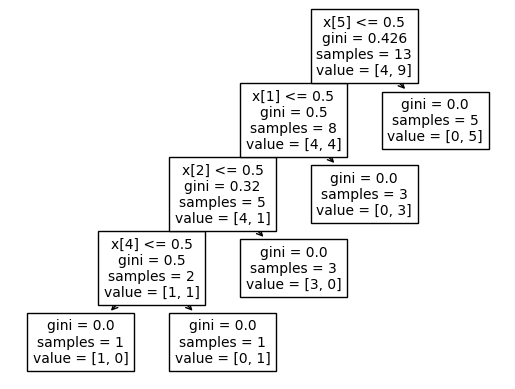

In [14]:
plot_tree(dc_tree)

In [15]:
file = open('F:\my project\dataset\learning_dataset\\housing.txt')
text = file.read()
text

' 0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00\n 0.02731   0.00   7.070  0  0.4690  6.4210  78.90  4.9671   2  242.0  17.80 396.90   9.14  21.60\n 0.02729   0.00   7.070  0  0.4690  7.1850  61.10  4.9671   2  242.0  17.80 392.83   4.03  34.70\n 0.03237   0.00   2.180  0  0.4580  6.9980  45.80  6.0622   3  222.0  18.70 394.63   2.94  33.40\n 0.06905   0.00   2.180  0  0.4580  7.1470  54.20  6.0622   3  222.0  18.70 396.90   5.33  36.20\n 0.02985   0.00   2.180  0  0.4580  6.4300  58.70  6.0622   3  222.0  18.70 394.12   5.21  28.70\n 0.08829  12.50   7.870  0  0.5240  6.0120  66.60  5.5605   5  311.0  15.20 395.60  12.43  22.90\n 0.14455  12.50   7.870  0  0.5240  6.1720  96.10  5.9505   5  311.0  15.20 396.90  19.15  27.10\n 0.21124  12.50   7.870  0  0.5240  5.6310 100.00  6.0821   5  311.0  15.20 386.63  29.93  16.50\n 0.17004  12.50   7.870  0  0.5240  6.0040  85.90  6.5921   5  311.0  15.20 386.71  17.10  18.90\n 0.22489  12.50   7

In [16]:
data = text.split('\n')
data

[' 0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00',
 ' 0.02731   0.00   7.070  0  0.4690  6.4210  78.90  4.9671   2  242.0  17.80 396.90   9.14  21.60',
 ' 0.02729   0.00   7.070  0  0.4690  7.1850  61.10  4.9671   2  242.0  17.80 392.83   4.03  34.70',
 ' 0.03237   0.00   2.180  0  0.4580  6.9980  45.80  6.0622   3  222.0  18.70 394.63   2.94  33.40',
 ' 0.06905   0.00   2.180  0  0.4580  7.1470  54.20  6.0622   3  222.0  18.70 396.90   5.33  36.20',
 ' 0.02985   0.00   2.180  0  0.4580  6.4300  58.70  6.0622   3  222.0  18.70 394.12   5.21  28.70',
 ' 0.08829  12.50   7.870  0  0.5240  6.0120  66.60  5.5605   5  311.0  15.20 395.60  12.43  22.90',
 ' 0.14455  12.50   7.870  0  0.5240  6.1720  96.10  5.9505   5  311.0  15.20 396.90  19.15  27.10',
 ' 0.21124  12.50   7.870  0  0.5240  5.6310 100.00  6.0821   5  311.0  15.20 386.63  29.93  16.50',
 ' 0.17004  12.50   7.870  0  0.5240  6.0040  85.90  6.5921   5  311.0  15.20 386.71  17.10

In [17]:
a = 'bahram papaki kashani'
a[:1]

'b'

In [18]:
a[2:]

'hram papaki kashani'

In [19]:
def separator(dt: str, sep: str = " "):
    exter = []
    prev = 0
    next = ''
    i = 0
    for i, j in enumerate(dt):
        if j == sep:
            exter.append(dt[prev:i])
            prev = i + 1
        if i <= len(dt):
            next = dt[prev:]
    exter.append(next)
    return exter

In [20]:
separator(a, 'a')

['b', 'hr', 'm p', 'p', 'ki k', 'sh', 'ni']

In [21]:

data2 = [i.split(' ') for i in data]
data2

[['',
  '0.00632',
  '',
  '18.00',
  '',
  '',
  '2.310',
  '',
  '0',
  '',
  '0.5380',
  '',
  '6.5750',
  '',
  '65.20',
  '',
  '4.0900',
  '',
  '',
  '1',
  '',
  '296.0',
  '',
  '15.30',
  '396.90',
  '',
  '',
  '4.98',
  '',
  '24.00'],
 ['',
  '0.02731',
  '',
  '',
  '0.00',
  '',
  '',
  '7.070',
  '',
  '0',
  '',
  '0.4690',
  '',
  '6.4210',
  '',
  '78.90',
  '',
  '4.9671',
  '',
  '',
  '2',
  '',
  '242.0',
  '',
  '17.80',
  '396.90',
  '',
  '',
  '9.14',
  '',
  '21.60'],
 ['',
  '0.02729',
  '',
  '',
  '0.00',
  '',
  '',
  '7.070',
  '',
  '0',
  '',
  '0.4690',
  '',
  '7.1850',
  '',
  '61.10',
  '',
  '4.9671',
  '',
  '',
  '2',
  '',
  '242.0',
  '',
  '17.80',
  '392.83',
  '',
  '',
  '4.03',
  '',
  '34.70'],
 ['',
  '0.03237',
  '',
  '',
  '0.00',
  '',
  '',
  '2.180',
  '',
  '0',
  '',
  '0.4580',
  '',
  '6.9980',
  '',
  '45.80',
  '',
  '6.0622',
  '',
  '',
  '3',
  '',
  '222.0',
  '',
  '18.70',
  '394.63',
  '',
  '',
  '2.94',
  '',
  '33

In [22]:
for i in data2:
    n = i.count('')
    for j in range(n):
        i.remove('')


In [23]:
data2

[['0.00632',
  '18.00',
  '2.310',
  '0',
  '0.5380',
  '6.5750',
  '65.20',
  '4.0900',
  '1',
  '296.0',
  '15.30',
  '396.90',
  '4.98',
  '24.00'],
 ['0.02731',
  '0.00',
  '7.070',
  '0',
  '0.4690',
  '6.4210',
  '78.90',
  '4.9671',
  '2',
  '242.0',
  '17.80',
  '396.90',
  '9.14',
  '21.60'],
 ['0.02729',
  '0.00',
  '7.070',
  '0',
  '0.4690',
  '7.1850',
  '61.10',
  '4.9671',
  '2',
  '242.0',
  '17.80',
  '392.83',
  '4.03',
  '34.70'],
 ['0.03237',
  '0.00',
  '2.180',
  '0',
  '0.4580',
  '6.9980',
  '45.80',
  '6.0622',
  '3',
  '222.0',
  '18.70',
  '394.63',
  '2.94',
  '33.40'],
 ['0.06905',
  '0.00',
  '2.180',
  '0',
  '0.4580',
  '7.1470',
  '54.20',
  '6.0622',
  '3',
  '222.0',
  '18.70',
  '396.90',
  '5.33',
  '36.20'],
 ['0.02985',
  '0.00',
  '2.180',
  '0',
  '0.4580',
  '6.4300',
  '58.70',
  '6.0622',
  '3',
  '222.0',
  '18.70',
  '394.12',
  '5.21',
  '28.70'],
 ['0.08829',
  '12.50',
  '7.870',
  '0',
  '0.5240',
  '6.0120',
  '66.60',
  '5.5605',
  '5

In [24]:
for i in range(len(data2)):
    for j in range(len(data2[i])):
        data2[i][j] = float(data2[i][j])
data2


[[0.00632,
  18.0,
  2.31,
  0.0,
  0.538,
  6.575,
  65.2,
  4.09,
  1.0,
  296.0,
  15.3,
  396.9,
  4.98,
  24.0],
 [0.02731,
  0.0,
  7.07,
  0.0,
  0.469,
  6.421,
  78.9,
  4.9671,
  2.0,
  242.0,
  17.8,
  396.9,
  9.14,
  21.6],
 [0.02729,
  0.0,
  7.07,
  0.0,
  0.469,
  7.185,
  61.1,
  4.9671,
  2.0,
  242.0,
  17.8,
  392.83,
  4.03,
  34.7],
 [0.03237,
  0.0,
  2.18,
  0.0,
  0.458,
  6.998,
  45.8,
  6.0622,
  3.0,
  222.0,
  18.7,
  394.63,
  2.94,
  33.4],
 [0.06905,
  0.0,
  2.18,
  0.0,
  0.458,
  7.147,
  54.2,
  6.0622,
  3.0,
  222.0,
  18.7,
  396.9,
  5.33,
  36.2],
 [0.02985,
  0.0,
  2.18,
  0.0,
  0.458,
  6.43,
  58.7,
  6.0622,
  3.0,
  222.0,
  18.7,
  394.12,
  5.21,
  28.7],
 [0.08829,
  12.5,
  7.87,
  0.0,
  0.524,
  6.012,
  66.6,
  5.5605,
  5.0,
  311.0,
  15.2,
  395.6,
  12.43,
  22.9],
 [0.14455,
  12.5,
  7.87,
  0.0,
  0.524,
  6.172,
  96.1,
  5.9505,
  5.0,
  311.0,
  15.2,
  396.9,
  19.15,
  27.1],
 [0.21124,
  12.5,
  7.87,
  0.0,
  0.524,


In [25]:
data2 = np.array(data2[:-1])
data2

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

In [26]:
data2 = pd.DataFrame(data2)
data2.to_csv('F:\my project\dataset\learning_dataset\\housing.csv')

In [27]:
data2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [28]:
boston_df = pd.read_csv('F:\my project\dataset\learning_dataset\\HousingData.csv')

In [29]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


array([[<AxesSubplot: xlabel='CRIM', ylabel='CRIM'>,
        <AxesSubplot: xlabel='ZN', ylabel='CRIM'>,
        <AxesSubplot: xlabel='INDUS', ylabel='CRIM'>,
        <AxesSubplot: xlabel='CHAS', ylabel='CRIM'>,
        <AxesSubplot: xlabel='NOX', ylabel='CRIM'>,
        <AxesSubplot: xlabel='RM', ylabel='CRIM'>,
        <AxesSubplot: xlabel='AGE', ylabel='CRIM'>,
        <AxesSubplot: xlabel='DIS', ylabel='CRIM'>,
        <AxesSubplot: xlabel='RAD', ylabel='CRIM'>,
        <AxesSubplot: xlabel='TAX', ylabel='CRIM'>,
        <AxesSubplot: xlabel='PTRATIO', ylabel='CRIM'>,
        <AxesSubplot: xlabel='B', ylabel='CRIM'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='CRIM'>,
        <AxesSubplot: xlabel='MEDV', ylabel='CRIM'>],
       [<AxesSubplot: xlabel='CRIM', ylabel='ZN'>,
        <AxesSubplot: xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot: xlabel='INDUS', ylabel='ZN'>,
        <AxesSubplot: xlabel='CHAS', ylabel='ZN'>,
        <AxesSubplot: xlabel='NOX', ylabel='ZN'>,
        <Ax

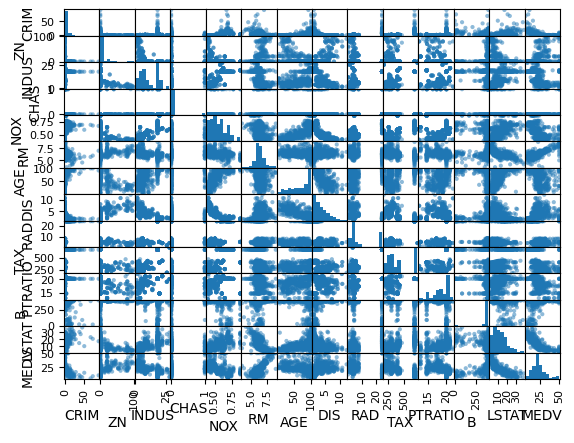

In [32]:
pd.plotting.scatter_matrix(boston_df)

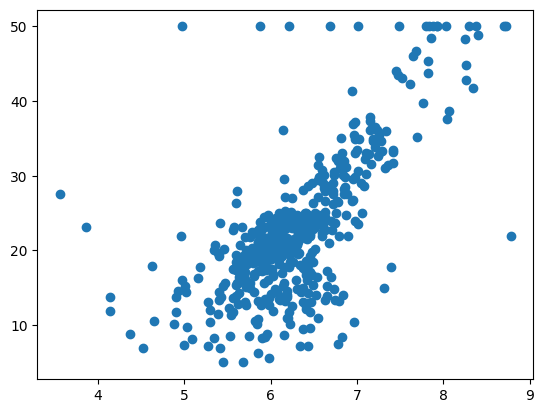

In [33]:
plt.scatter(boston_df.RM, boston_df.MEDV)

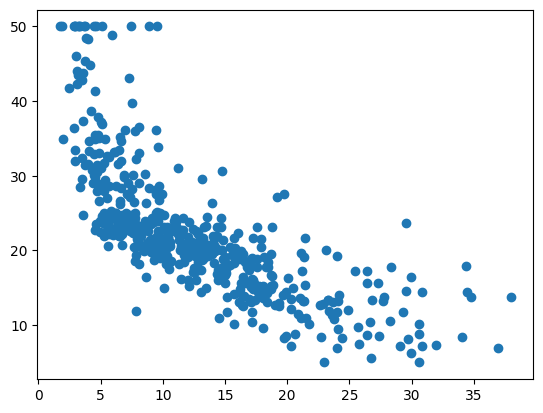

In [34]:
plt.scatter(boston_df.LSTAT, boston_df.MEDV)

In [41]:
bost_df = boston_df.fillna(0)

In [42]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [43]:
type(boston_df.RM[0])

numpy.float64

In [49]:
corr_target = boston_df.corrwith(boston_df.MEDV, axis=0)
corr_target

CRIM      -0.391363
ZN         0.373136
INDUS     -0.481772
CHAS       0.181391
NOX       -0.427321
RM         0.695360
AGE       -0.394656
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.735822
MEDV       1.000000
dtype: float64

In [56]:
mask = corr_target > 0.6
mask = mask + (corr_target < -0.6)
mask

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM          True
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT       True
MEDV        True
dtype: bool

In [64]:
data_f=bost_df.loc[:,mask]
data_f

,RM,LSTAT,MEDV
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,0.00,36.2
...,...,...,...
501,6.593,0.00,22.4
502,6.120,9.08,20.6
503,6.976,5.64,23.9
504,6.794,6.48,22.0


In [65]:
x=data_f.values[:,[0,1]]
x

array([[6.575, 4.98 ],
       [6.421, 9.14 ],
       [7.185, 4.03 ],
       ...,
       [6.976, 5.64 ],
       [6.794, 6.48 ],
       [6.03 , 7.88 ]])

In [66]:
y=data_f.values[:,2]
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [71]:
from sklearn.ensemble import RandomForestRegressor

In [73]:
rnd_c=RandomForestRegressor(n_estimators=100)
x_tr,x_ts,y_tr,y_ts=train_test_split(x,y,test_size=0.2,shuffle=True)
rnd_c.fit(x_tr,y_tr)


RandomForestRegressor()

In [74]:
rnd_c.score(x_ts,y_ts)

0.8104868096613645